# Interactive visualization

In [20]:
import os
import pandas as pd
import json
import folium
from IPython.display import display, HTML
from ipywidgets import widgets
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
europe_unemployment_data = pd.DataFrame.from_csv('data/europe_unemployment.tsv', sep='\t', header=0)
europe_unemployment_data.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
"age,unit,sex,geo\time",,,,,,,,,,,,,,,,,,,,,
"TOTAL,PC_ACT,T,AT",:,:,:,:,4.3,4.2,4.7,4.7,4.7,4.2,...,4.9,4.1,5.3,4.8,4.6,4.9,5.4,5.6,5.7,6.0
"TOTAL,PC_ACT,T,BE",6.6,6.4,7.1,8.6,9.8,9.7,9.5,9.2,9.3,8.4,...,7.5,7.0,7.9,8.3,7.2,7.6,8.4,8.5,8.5,7.8
"TOTAL,PC_ACT,T,BG",:,:,:,:,:,:,:,:,:,:,...,6.9,5.6,6.8,10.3 i,11.3,12.3,13.0,11.4,9.2,7.6
"TOTAL,PC_ACT,T,CY",:,:,:,:,:,:,:,:,:,:,...,3.9,3.7,5.4,6.3,7.9,11.9,15.9,16.1,15.0,13.0
"TOTAL,PC_ACT,T,CZ",:,:,:,4.3,4.3,4.0,3.9,4.8,6.5,8.7,...,5.3,4.4,6.7,7.3,6.7,7.0,7.0,6.1,5.1,4.0


## Description taken from eurostat: 

Unemployment rates represent unemployed persons as a percentage of the labour force. The labour force is the total number of people employed and unemployed. Unemployed persons comprise persons aged 15 to 74 who were: a. without work during the reference week, b. currently available for work, i.e. were available for paid employment or self-employment before the end of the two weeks following the reference week, c. actively seeking work, i.e. had taken specific steps in the four weeks period ending with the reference week to seek paid employment or self-employment or who found a job to start later, i.e. within a period of, at most, three months. This table does not only show unemployment rates but also unemployed in 1000 and as % of the total population. 

In [3]:
europe_unemployment_data_2016 = europe_unemployment_data[europe_unemployment_data.index.str.match(".*PC_ACT.*")]['2016 '].reset_index()

europe_unemployment_data_2016.columns = ['Country', 'Rate']
europe_unemployment_data_2016['Country'] = europe_unemployment_data_2016['Country'].str.extract('(..$)', expand=False)

In [4]:
europe_unemployment_data_2016.at[35, 'Country']= 'GB'

In [5]:
europe_json = json.load(open("topojson/europe.topojson.json"))
m = folium.Map([47.870833, 9.085721], tiles='cartodbpositron', zoom_start=4)
m.choropleth(europe_json, 
             data=europe_unemployment_data_2016, 
             columns=['Country', 'Rate'], 
             key_on='feature.id', 
             fill_color='YlOrRd',
             topojson='objects.europe',
             )
m

# 2 Swiss unemployment data
## 2.a Counting people with jobs, looking for another job

In [6]:
swiss_unemployment_data = pd.read_csv('data/swiss_unemployment_total.csv')
swiss_unemployment_rates = swiss_unemployment_data.copy()[['Canton','Taux de chômage (1 cav)','Taux de chômage des jeunes (1 pdv)']]
swiss_unemployment_rates.head()

,Canton,Taux de chômage (1 cav),Taux de chômage des jeunes (1 pdv)
0,Zurich,3.7,4.1
1,Berne,2.7,2.9
2,Vaud,4.7,4.4
3,Argovie,3.2,3.2
4,Genève,5.5,5.4


In [7]:
cantons_dict = {'Zurich': 'ZH', 'Berne': 'BE','Lucerne':'LU','Uri':'UR','Schwyz':'SZ',
    'Obwald':'OW','Nidwald':'NW','Glaris':'GL','Zoug':'ZG','Fribourg':'FR',
    'Soleure':'SO','Bâle-Ville':'BS','Bâle-Campagne':'BL','Schaffhouse':'SH',
    'Appenzell Rhodes-Extérieures':'AR','Appenzell Rhodes-Intérieures':'AI',
    'St-Gall':'SG','Grisons':'GR','Argovie':'AG','Thurgovie':'TG','Tessin':'TI',
    'Vaud':'VD','Valais':'VS','Neuchâtel':'NE','Genève':'GE','Jura':'JU'}

swiss_unemployment_rates.Canton.replace(cantons_dict, inplace=True)

In [8]:
swiss_json = json.load(open("topojson/ch-cantons.topojson.json"))

map_ = folium.Map([46.819393, 8.333115], tiles='cartodbpositron', zoom_start=8)
map_.choropleth(swiss_json, 
             data=swiss_unemployment_rates, 
             columns=['Canton', 'Taux de chômage (1 cav)'], 
             key_on='feature.id', 
             fill_color='YlOrRd',
             topojson='objects.cantons'
             )
map_

## 2.b Unemployment, without people with job

# 3 Swiss unemployment, split

## 3.a Split by nationality

In [9]:
swiss_unemployment_nationality_data = pd.read_csv('data/swiss_unemployment_nationality_split.csv')
swiss_unemployment_nationality_rates = swiss_unemployment_nationality_data.copy()[['Canton','Taux de chômage (1 cav)','Nationalité']]

swiss_unemployment_nationality_rates.Canton.replace(cantons_dict, inplace=True)

In [10]:
swiss_unemployment_foreign_rates = swiss_unemployment_nationality_rates[swiss_unemployment_nationality_rates['Nationalité'] =='Etrangers']
swiss_unemployment_swiss_rates = swiss_unemployment_nationality_rates[swiss_unemployment_nationality_rates['Nationalité'] =='Suisses']

In [11]:
map_ = folium.Map([46.819393, 8.333115], tiles='cartodbpositron', zoom_start=8)
map_.choropleth(swiss_json, 
     data=swiss_unemployment_swiss_rates, 
     columns=['Canton', 'Taux de chômage (1 cav)'], 
     key_on='feature.id', 
     fill_color='YlOrRd',
     topojson='objects.cantons',
     threshold_scale=[1, 3, 5, 7, 9, 11]
)

map_

In [12]:
map_ = folium.Map([46.819393, 8.333115], tiles='cartodbpositron', zoom_start=8)
map_.choropleth(swiss_json, 
    data=swiss_unemployment_foreign_rates, 
    columns=['Canton', 'Taux de chômage (1 cav)'], 
    key_on='feature.id', 
    fill_color='YlOrRd',
    topojson='objects.cantons',
    threshold_scale=[1, 3, 5, 7, 9, 11]
)
map_

In [13]:
def on_click_b(x):
    map_ = folium.Map([46.819393, 8.333115], tiles='cartodbpositron', zoom_start=8)
    if x:
        map_.choropleth(swiss_json, 
             data=swiss_unemployment_swiss_rates, 
             columns=['Canton', 'Taux de chômage (1 cav)'], 
             key_on='feature.id', 
             fill_color='YlOrRd',
             topojson='objects.cantons',
                 threshold_scale=[1, 3, 5, 7, 9, 11]
                )
    else:
        map_.choropleth(swiss_json, 
                 data=swiss_unemployment_foreign_rates, 
                 columns=['Canton', 'Taux de chômage (1 cav)'], 
                 key_on='feature.id', 
                 fill_color='YlOrRd',
                 topojson='objects.cantons',
                 threshold_scale=[1, 3, 5, 7, 9, 11]
                )
    
    display(map_)

w = widgets.Dropdown(options={'Swiss': True, 'Foreigner': False},description='Selection')
interact(on_click_b,x=w)

A Jupyter Widget

<function __main__.on_click_b>

## 3.b Split by nationality and age

In [14]:
def to_numeric(x):
    return(x.str.replace('\'', '')).astype('int64')

In [69]:
swiss_unemployment_nationality_age_data = pd.read_csv('data/swiss_unemployment_nationality_age_split.csv')
swiss_unemployment_nationality_age_rates = swiss_unemployment_nationality_age_data.copy()

swiss_unemployment_nationality_age_rates = swiss_unemployment_nationality_age_rates.drop(['Unnamed: 3','Mois'], 1)
swiss_unemployment_nationality_age_rates.loc[:,"Janvier 2016":"Décembre 2016"] = swiss_unemployment_nationality_age_rates.loc[:,"Janvier 2016":"Décembre 2016"].apply(lambda x: to_numeric(x), axis=1)
swiss_unemployment_nationality_age_rates["Mean"] = (swiss_unemployment_nationality_age_rates.loc[:,"Janvier 2016":"Décembre 2016"].sum(axis=1)/12).astype('int64')

swiss_unemployment_nationality_age_rates = swiss_unemployment_nationality_age_rates[['Canton','Nationalité','Classes d\'âge 15-24, 25-49, 50 ans et plus','Mean']]

swiss_unemployment_nationality_age_rates = swiss_unemployment_nationality_age_rates[swiss_unemployment_nationality_age_rates['Canton'] != 'Total']
swiss_unemployment_nationality_age_rates = swiss_unemployment_nationality_age_rates[swiss_unemployment_nationality_age_rates['Nationalité'] != 'Total']
swiss_unemployment_nationality_age_rates = swiss_unemployment_nationality_age_rates[swiss_unemployment_nationality_age_rates['Classes d\'âge 15-24, 25-49, 50 ans et plus'] != 'Total']

swiss_unemployment_nationality_age_rates['Nationality and age'] = swiss_unemployment_nationality_age_rates['Nationalité'] + swiss_unemployment_nationality_age_rates['Classes d\'âge 15-24, 25-49, 50 ans et plus'] 

swiss_unemployment_nationality_age_rates = swiss_unemployment_nationality_age_rates.pivot(index='Canton', columns= 'Nationality and age', values='Mean')

display(swiss_unemployment_nationality_age_rates)



Nationality and age,Etrangers1,Etrangers2,Etrangers3,Suisses1,Suisses2,Suisses3
Canton,,,,,,
Appenzell Rhodes-Extérieures,19,128,57,55,155,141
Appenzell Rhodes-Intérieures,5,24,14,10,24,17
Argovie,605,3764,1109,921,3094,1988
Berne,542,4050,1198,1568,4896,3026
Bâle-Campagne,164,1262,380,354,1406,876
Bâle-Ville,156,1500,404,256,1036,477
Fribourg,230,1537,410,384,1341,739
Genève,380,4979,1174,686,4193,1550
Glaris,33,163,65,48,125,93


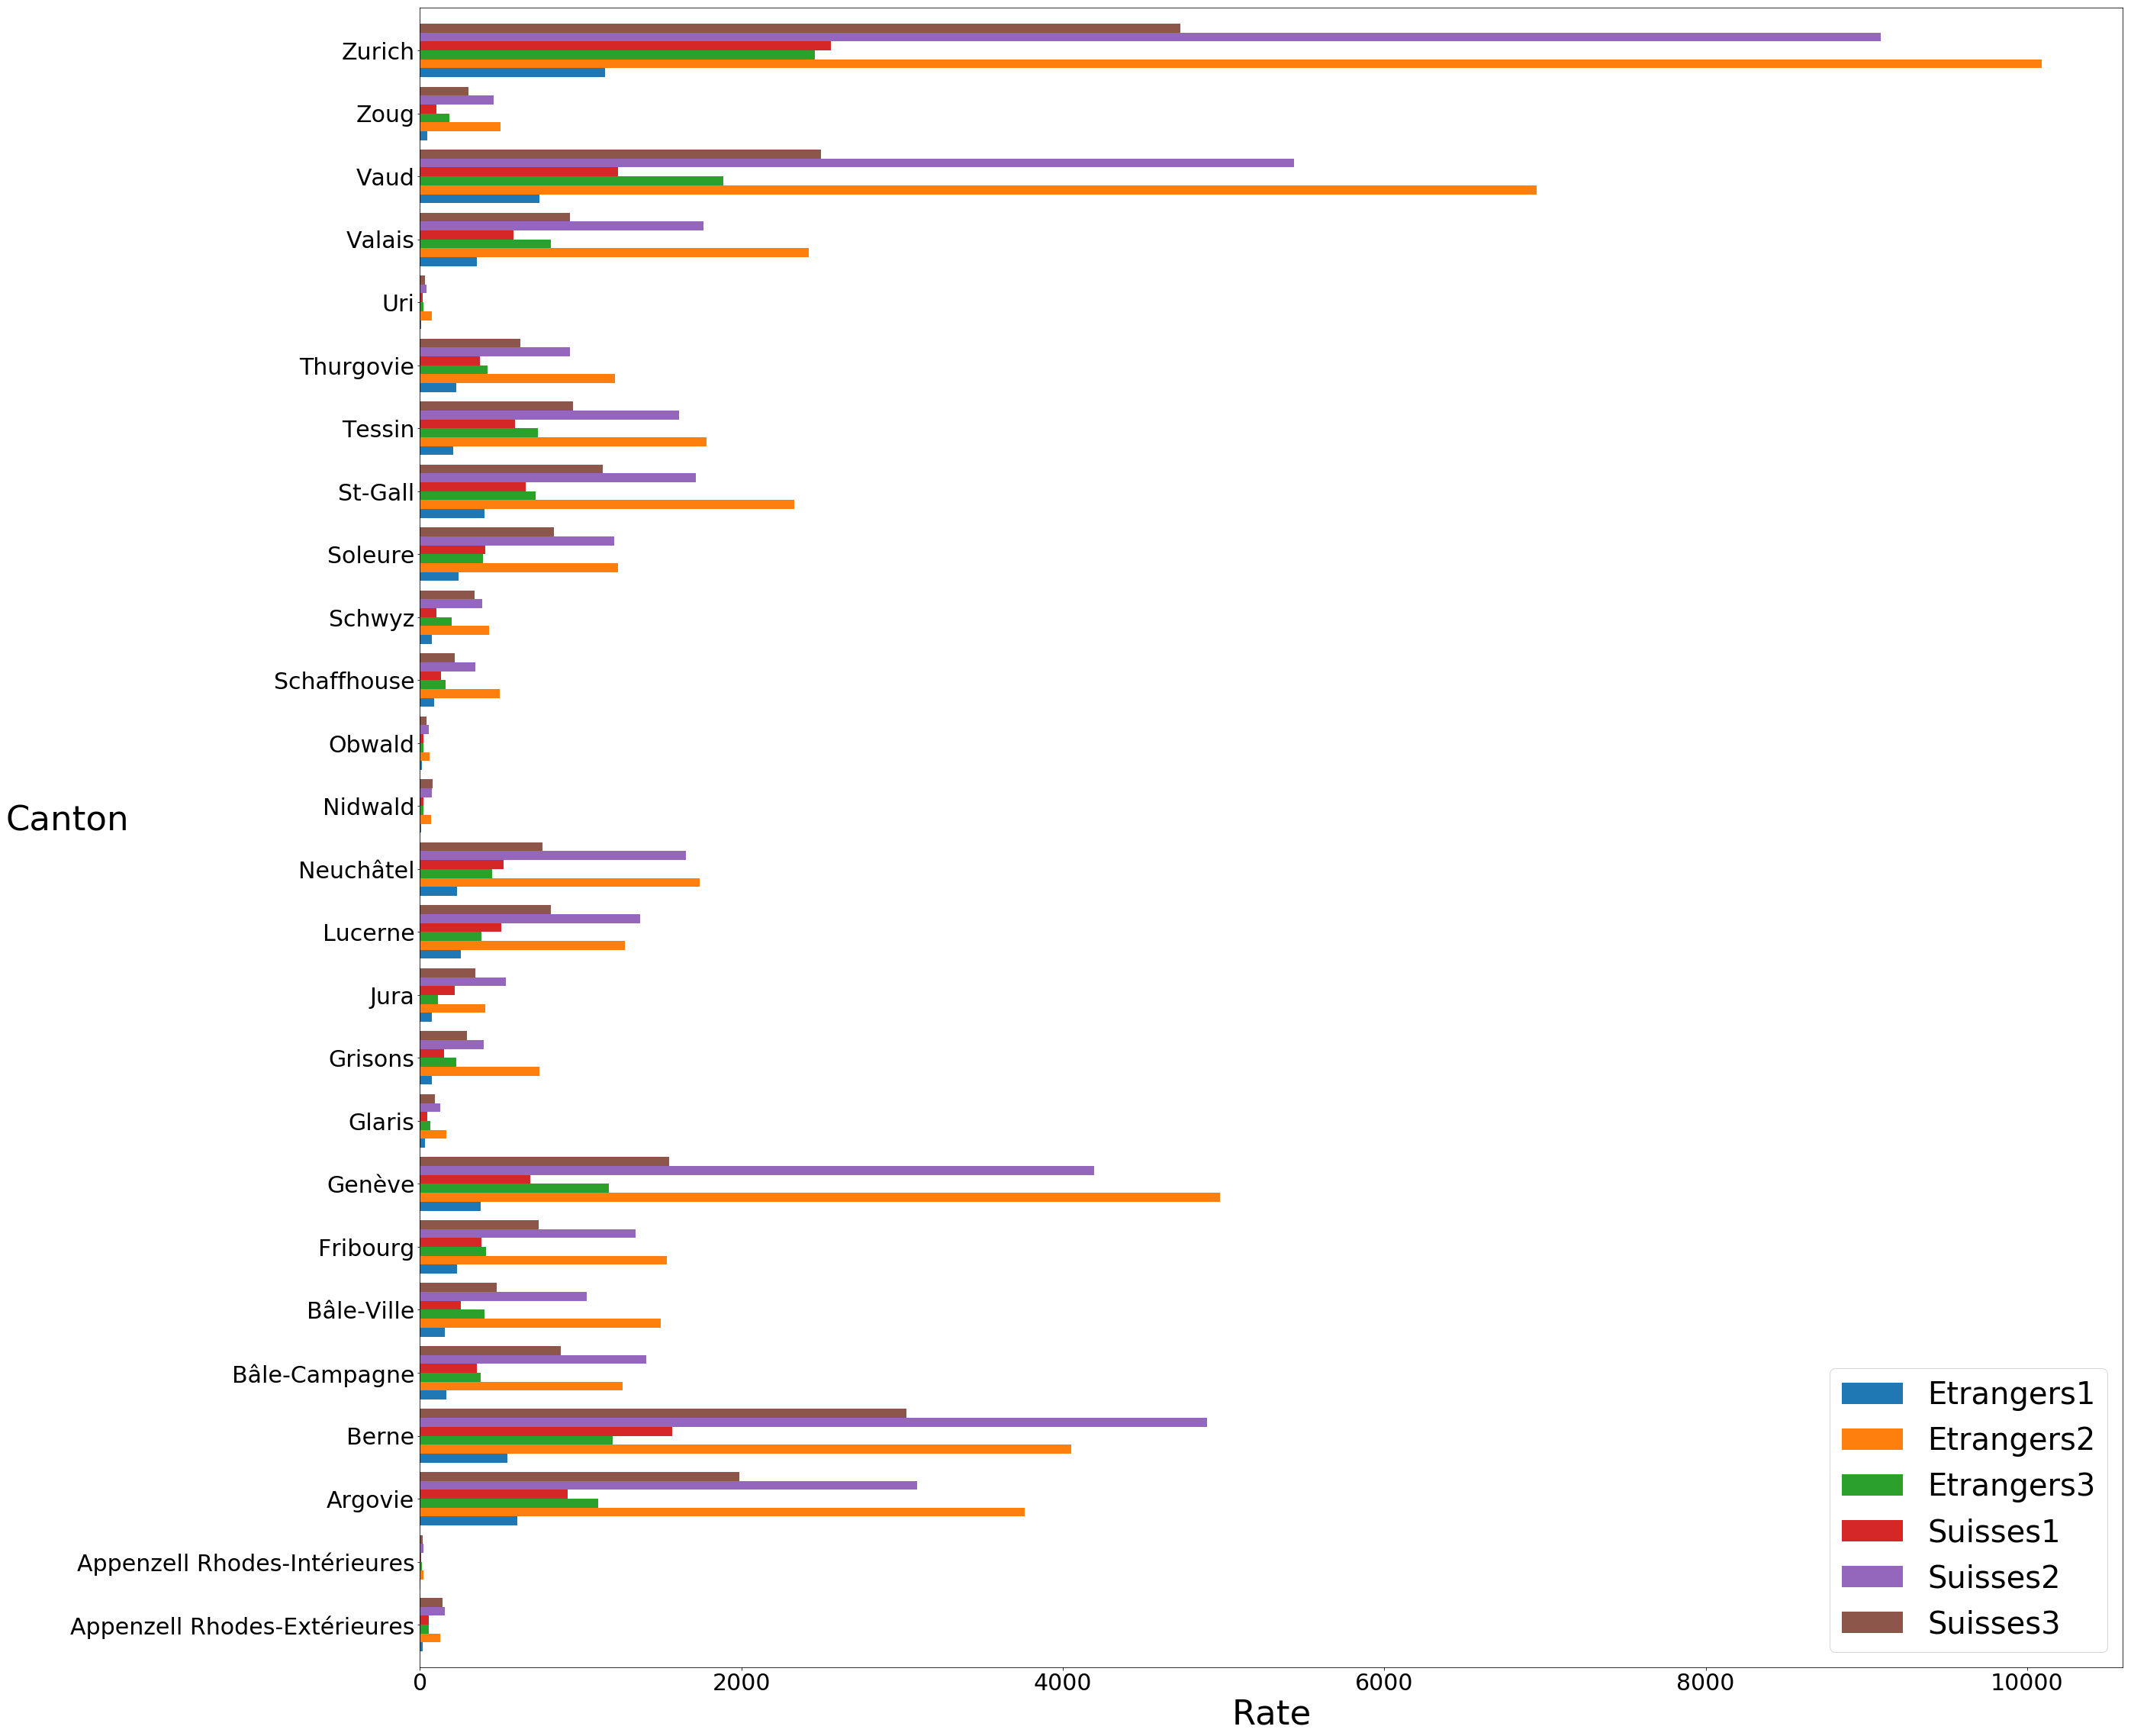

In [71]:
swiss_unemployment_nationality_age_rates.plot.barh(grid =False,fontsize= 30,width = 0.85)
rcParams['figure.figsize'] = 40,40
plt.xlabel('Rate',fontsize = 45)
plt.ylabel('Canton', fontsize=45,rotation = 0)
plt.legend(
   fontsize=40)
plt.show()

# 4  Röstigraben Delimitation

In [ ]:
map_ = folium.Map([46.919393, 8.334115], tiles='cartodbpositron', zoom_start=8)

unemployment_swiss_dict = swiss_unemployment_swiss_rates.set_index('Canton')['Taux de chômage (1 cav)']
unemployment_foreign_dict = swiss_unemployment_foreign_rates.set_index('Canton')['Taux de chômage (1 cav)']

foreign_mean = unemployment_foreign_dict.mean()
swiss_mean = unemployment_swiss_dict.mean()

foreign_min = unemployment_foreign_dict.min()
swiss_min = unemployment_swiss_dict.min()

foreign_max = unemployment_foreign_dict.max()
swiss_max = unemployment_swiss_dict.max()


unem_swiss_unem_foreign_color = '#ae017e'
unem_swiss_em_foreign_color = '#fc4e2a'
em_swiss_unem_foreign_color = '#1d91c0'
em_swiss_em_foreign_color = '#fde0dd'



def my_color_function(feature):
    if unemployment_swiss_dict[feature['id']] > swiss_mean:
        if unemployment_foreign_dict[feature['id']] > foreign_mean:
            return unem_swiss_unem_foreign_color
        else:
            return unem_swiss_em_foreign_color
    else:
        if unemployment_foreign_dict[feature['id']] > foreign_mean:
            return em_swiss_unem_foreign_color
        else:
            return em_swiss_em_foreign_color
    

folium.TopoJson(
    swiss_json,
    object_path ='objects.cantons',
    style_function=lambda feature: {
        'fillColor': my_color_function(feature),
    }
).add_to(map_)

step = cm.StepColormap(
    [em_swiss_em_foreign_color, unem_swiss_em_foreign_color],
   vmin= swiss_min,vmax = swiss_max,
    index=[swiss_min, swiss_mean,swiss_max],
    caption='Unemployment rate of Swiss for low unemployment rate of Foreigners'
).add_to(map_)

step = cm.StepColormap(
    [em_swiss_unem_foreign_color, unem_swiss_unem_foreign_color],
    vmin= swiss_min,vmax = swiss_max,
    index=[swiss_min, swiss_mean,swiss_max],
    caption='Unemployment rate of Swiss for high unemployment rate of Foreigners'
).add_to(map_)



print(swiss_min, swiss_mean,swiss_max)
map_